In [1]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("Analysis-NoTimeShift-Activity-Sorted.csv")


In [3]:
df.head()


,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [4]:
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})


In [5]:
df.head()

,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [6]:
df.subject.unique()

array([ 114.,  122.,  115.,  104.,  111.,  107.,  112.,  102.,  118.,
        110.,  103.,  105.,  109.,  117.,  108.,  113.,  120.,  101.,
        123.,  106.,  124.,  119.,  116.,  121.])

In [7]:
Y = df['activity']

In [8]:
features = ['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean','x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', 'z fft bin 7', 'z fft bin 8', 'z fft bin 9','x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
'z noise max', 'x noise std', 'y noise std', 'z noise std']
#features_ind = list(range(16,104))
X = df[features]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', '

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,1.096704,0.879901,0.035263,-0.256016,2.947613,0.996619,0.994714,0.320,-0.836,0.465,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1.777750,0.444051,0.296776,0.469835,-0.145111,1.027260,1.013155,0.688,-0.398,1.309,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,1.181703,0.846446,0.062314,0.095966,0.463856,1.016351,1.005488,0.441,-0.664,0.902,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,1.227883,0.775228,0.077944,0.459561,1.728157,1.000864,0.990655,0.355,-0.254,1.000,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,1.251106,0.838346,0.088783,0.490714,-0.105809,1.007371,0.988382,0.355,-0.668,0.734,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [9]:
# features analysis
def select_features(X, Y, plot=False):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    
    feature_names = X.columns.tolist()

#     X = data[feature_names]
#     Y = data['activity']

    forest.fit(X, Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    importances = np.array(importances)
    importances /= importances.max()

    if plot:
        for f in range(X.shape[1]):
            print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        
    # select features > 25 % importance
    features = [i for i,j in zip(feature_names,importances) if j > 0.25]

    print ("Selected number of features: %d" % len(features))

    if plot:
        for f in range(len(features)):
            print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
        
    return features

In [10]:
class_names = [101, 103, 104, 201, 301, 302, 303, 304]
print(class_names)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[101, 103, 104, 201, 301, 302, 303, 304]


In [14]:
# grid search with cross-validation (subject-wise or k-folds) for picking hyperparameters
# returns list with best estimators
# params:
# X_train - training data
# y_train - labels
# kfoldcv - true to use 10-fold cross-validation
# display - boolean for printing out cross-validation info
def grid(X_train,y_train, display=False, kfoldcv=True):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
                                               'min_samples_leaf': [1, 5, 10, 15, 20],#     v
                                               'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

    models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    models.append([svm.SVC(kernel='rbf'), { # class_weight="balanced"; tol 
                              'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    
    models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])


    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)
    
    # for 10-folds cross-validation
    if kfoldcv:
        cv = 10 

    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        if (display):
            print(model[2], ": ")
            print("Best score for ", model[2], ":", clf.best_score_)
            print()
            print("Best parameters for ", model[2], " found on development set:", best_params)
    #         print()
    #         print("Best estimator for ", model[2], " model:", best_estimator)
            print()
    #         print()

    #         print("Grid scores on development set:")
    #         print()
    #         for params, mean_score, scores in clf.grid_scores_:
    #             print("%0.3f (+/-%0.03f) for %r"
    #                   % (mean_score, scores.std() * 2, params))
            print()

    #     print(models_with_best_params)
    
#     return best_params['n_estimators']
    return  models_with_best_params

In [15]:
test_classifiers = []
def test_classifier (model, X_train, y_train, X_test, y_test):
#     classifier = RandomForestClassifier(n_estimators=pram)
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: ' + model[2])

    plt.show()
    test_classifiers.append([metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix])
    return [metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix]

Number of subjects:  24
114.0
Selected number of features: 88
Train set size after feature selection:  (3326, 88)
Test set size after feature selection:  (43, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.42857   0.52941   0.47368        17
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.00000   0.00000   0.00000         0
      201.0    0.33333   0.06250   0.10526        16
      301.0    0.17647   0.30000   0.22222        10

avg / total    0.33451   0.30233   0.27812        43


Co

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


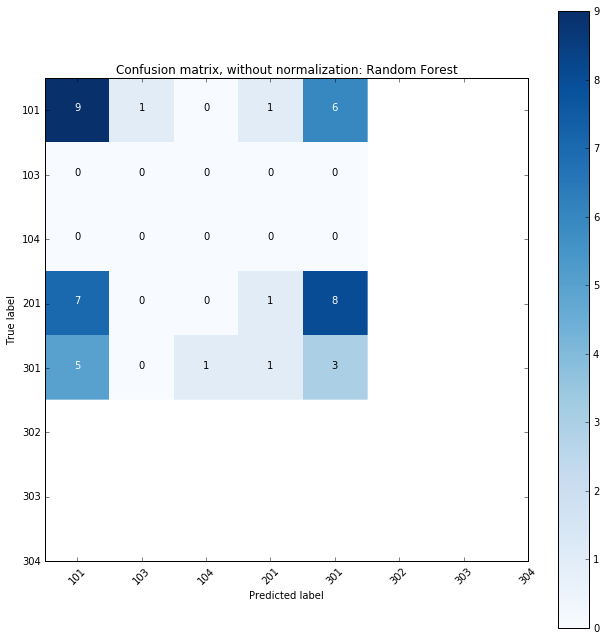

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


122.0
Selected number of features: 88
Train set size after feature selection:  (3116, 88)
Test set size after feature selection:  (253, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.31034   0.63158   0.41618        57
      104.0    0.00000   0.00000   0.00000         6
      201.0    0.00000   0.00000   0.00000         3
      301.0    0.61972   0.34375   0.44221       128
      302.0    0.00000   0.00000   0.00000        11
      303.0    0.33333   0.09302   0.14545        43
      304.0    0.00000   0.0

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


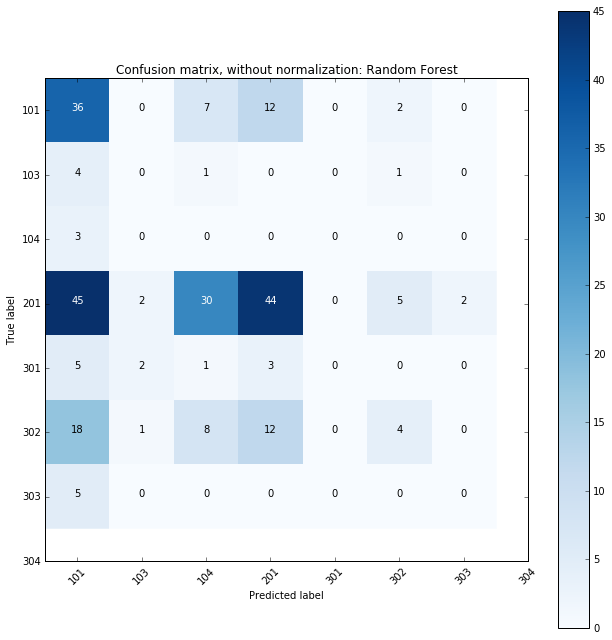

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


115.0
Selected number of features: 88
Train set size after feature selection:  (3218, 88)
Test set size after feature selection:  (151, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.62712   0.88095   0.73267        42
      103.0    0.33333   0.14286   0.20000         7
      104.0    0.00000   0.00000   0.00000         7
      201.0    0.00000   0.00000   0.00000        18
      301.0    0.46296   0.58140   0.51546        43
      302.0    0.10000   0.11111   0.10526         9
      303.0    0.52941   0.6

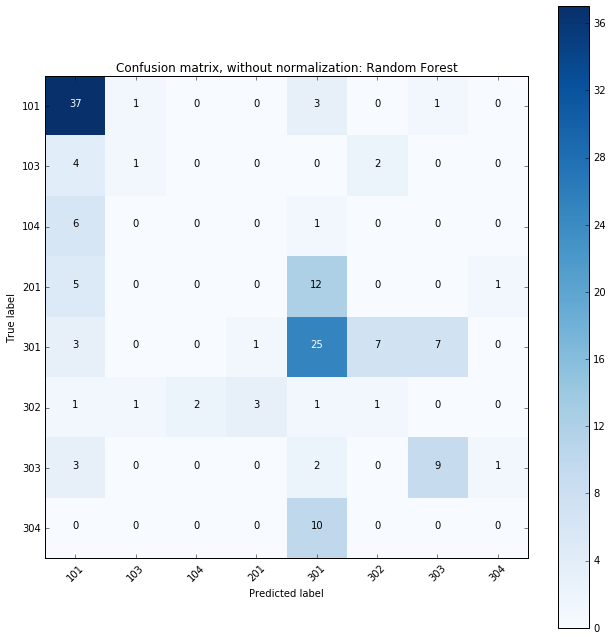

104.0
Selected number of features: 88
Train set size after feature selection:  (3264, 88)
Test set size after feature selection:  (105, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.59420   1.00000   0.74545        41
      103.0    1.00000   0.28571   0.44444         7
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.00000   0.00000   0.00000         5
      301.0    0.92308   0.41379   0.57143        29
      302.0    1.00000   1.00000   1.00000        12
      303.0    1.00000   0.3

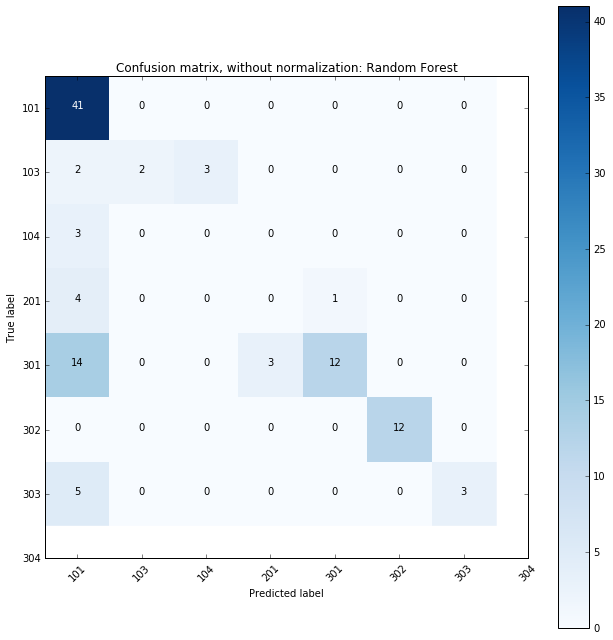

111.0
Selected number of features: 88
Train set size after feature selection:  (3258, 88)
Test set size after feature selection:  (111, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.34921   0.61111   0.44444        36
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000        17
      201.0    0.25000   0.04762   0.08000        21
      301.0    0.12000   0.25000   0.16216        12
      302.0    0.00000   0.00000   0.00000        10
      303.0    0.00000   0.0

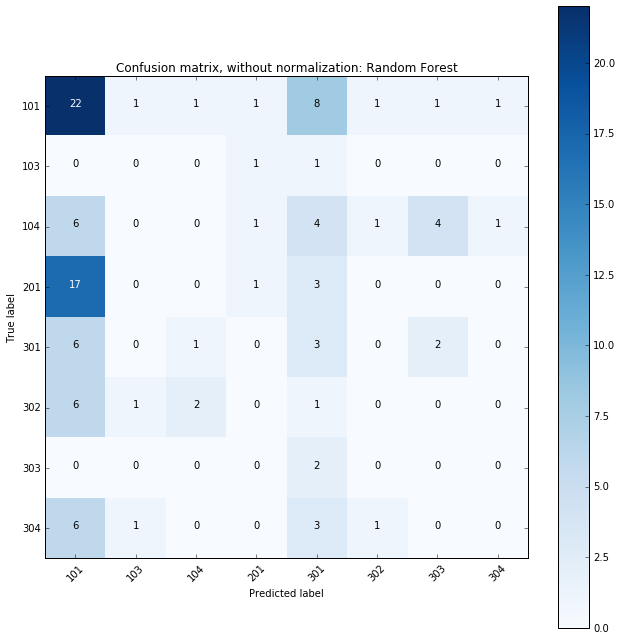

107.0
Selected number of features: 88
Train set size after feature selection:  (3225, 88)
Test set size after feature selection:  (144, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.53846   1.00000   0.70000        21
      104.0    0.00000   0.00000   0.00000        11
      201.0    0.00000   0.00000   0.00000        31
      301.0    0.45055   0.87234   0.59420        47
      302.0    0.00000   0.00000   0.00000         7
      303.0    0.40000   0.20000   0.26667        10
      304.0    1.00000   0.1

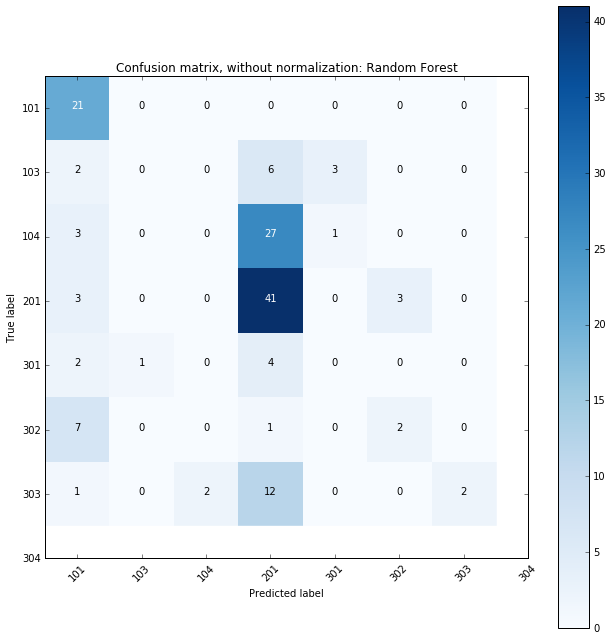

112.0
Selected number of features: 88
Train set size after feature selection:  (3236, 88)
Test set size after feature selection:  (133, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.54054   0.74074   0.62500        27
      103.0    0.50000   0.44444   0.47059         9
      104.0    0.33333   0.09091   0.14286        11
      201.0    0.77778   0.53846   0.63636        13
      301.0    0.58730   0.78723   0.67273        47
      302.0    1.00000   0.25000   0.40000         4
      303.0    0.20000   0.1

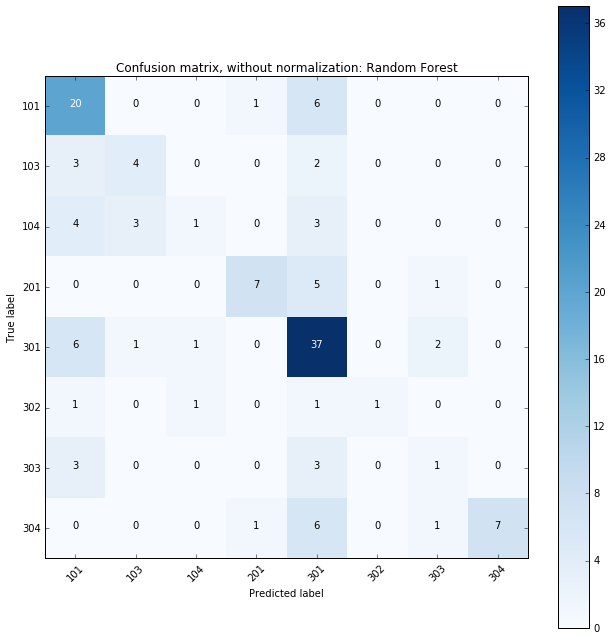

102.0
Selected number of features: 88
Train set size after feature selection:  (3143, 88)
Test set size after feature selection:  (226, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.84906   0.95745   0.90000        47
      103.0    1.00000   0.80000   0.88889        10
      104.0    1.00000   0.09091   0.16667        11
      201.0    0.00000   0.00000   0.00000         8
      301.0    0.37037   0.80000   0.50633        25
      302.0    1.00000   0.66667   0.80000         6
      303.0    0.85714   0.5

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


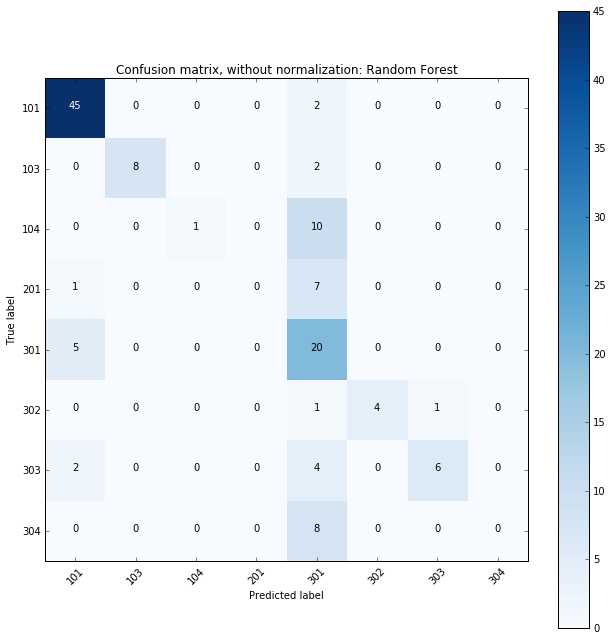

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


110.0
Selected number of features: 88
Train set size after feature selection:  (3277, 88)
Test set size after feature selection:  (92, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.55556   0.54348   0.54945        46
      103.0    0.00000   0.00000   0.00000         4
      104.0    0.50000   0.14286   0.22222         7
      201.0    0.27273   0.21429   0.24000        14
      301.0    0.16667   0.50000   0.25000        10
      302.0    0.00000   0.00000   0.00000         3
      303.0    0.00000   0.00

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


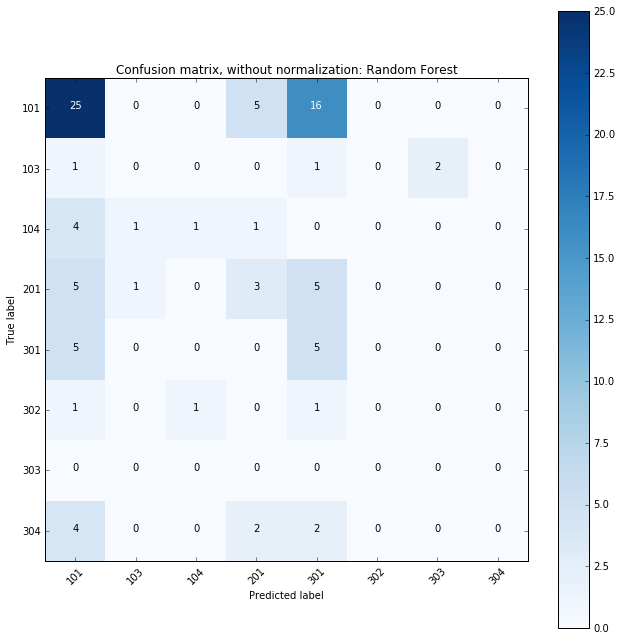

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


103.0
Selected number of features: 88
Train set size after feature selection:  (3176, 88)
Test set size after feature selection:  (193, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.26050   0.75610   0.38750        41
      103.0    0.00000   0.00000   0.00000         6
      104.0    0.00000   0.00000   0.00000         9
      201.0    0.10000   0.04878   0.06557        41
      301.0    0.27778   0.10870   0.15625        46
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.00000   0.0

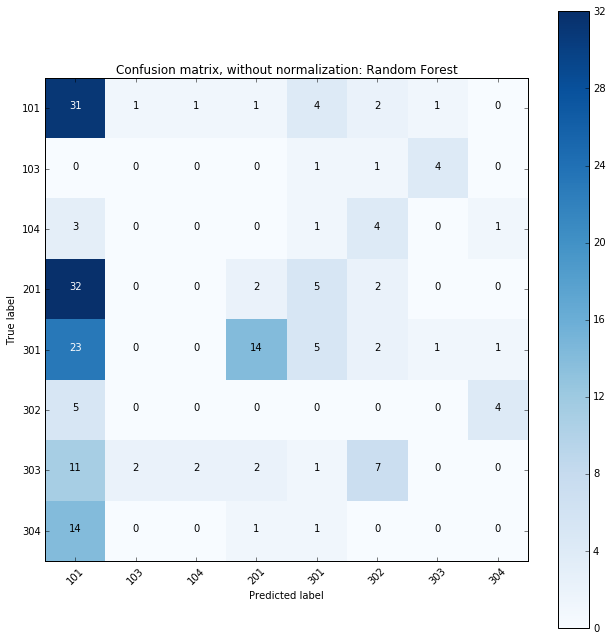

105.0
Selected number of features: 88
Train set size after feature selection:  (3184, 88)
Test set size after feature selection:  (185, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.51042   0.70000   0.59036        70
      103.0    0.00000   0.00000   0.00000         1
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.00000   0.00000   0.00000        41
      301.0    0.03774   0.12500   0.05797        16
      302.0    0.78261   0.78261   0.78261        23
      303.0    0.00000   0.0

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


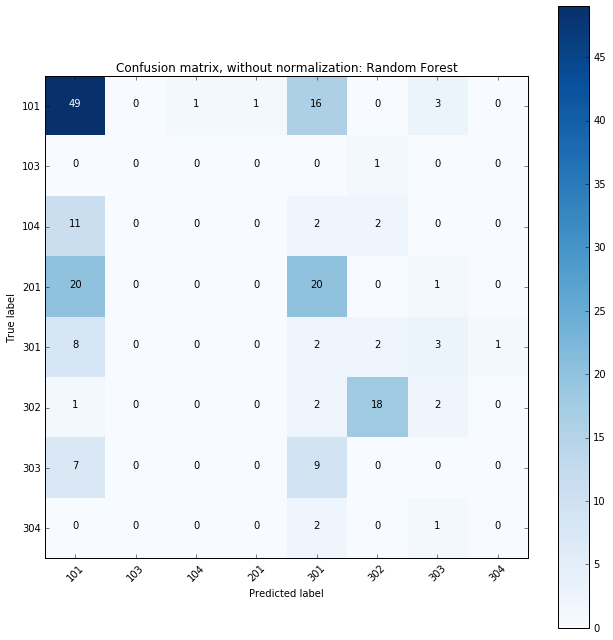

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


109.0
Selected number of features: 88
Train set size after feature selection:  (3226, 88)
Test set size after feature selection:  (143, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.78082   0.86364   0.82014        66
      103.0    1.00000   0.33333   0.50000         3
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.33333   0.07407   0.12121        27
      301.0    0.25926   0.35000   0.29787        20
      302.0    0.33333   0.33333   0.33333         6
      303.0    0.28000   0.53

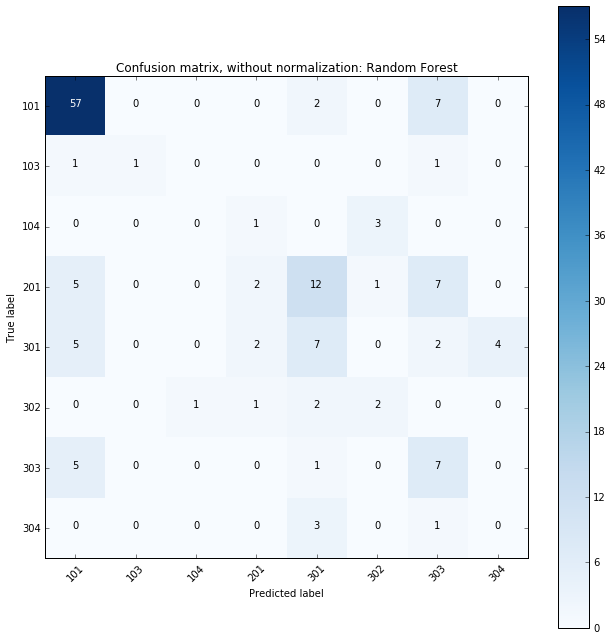

117.0
Selected number of features: 88
Train set size after feature selection:  (3305, 88)
Test set size after feature selection:  (64, 88)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.59259   0.94118   0.72727        17
      104.0    1.00000   0.33333   0.50000         9
      201.0    0.00000   0.00000   0.00000         9
      301.0    0.32000   0.80000   0.45714        10
      303.0    0.85714   0.40000   0.54545        15
      304.0    0.00000   0.00000   0.00000         4

avg / total    0.54893   0.51562   0.46276        64


Confusion matrix


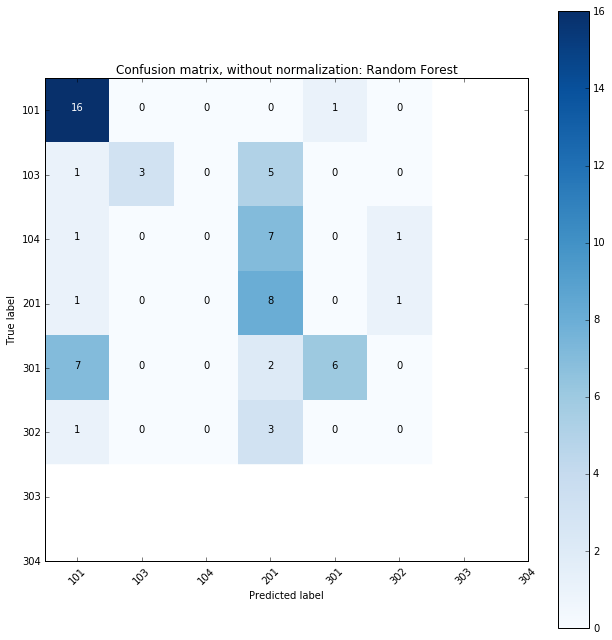

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


108.0
Selected number of features: 88
Train set size after feature selection:  (3173, 88)
Test set size after feature selection:  (196, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.36559   0.50746   0.42500        67
      103.0    0.12500   0.16667   0.14286        12
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.62500   0.23810   0.34483        21
      301.0    0.40000   0.37500   0.38710        64
      302.0    1.00000   0.12500   0.22222         8
      303.0    0.50000   0.0

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


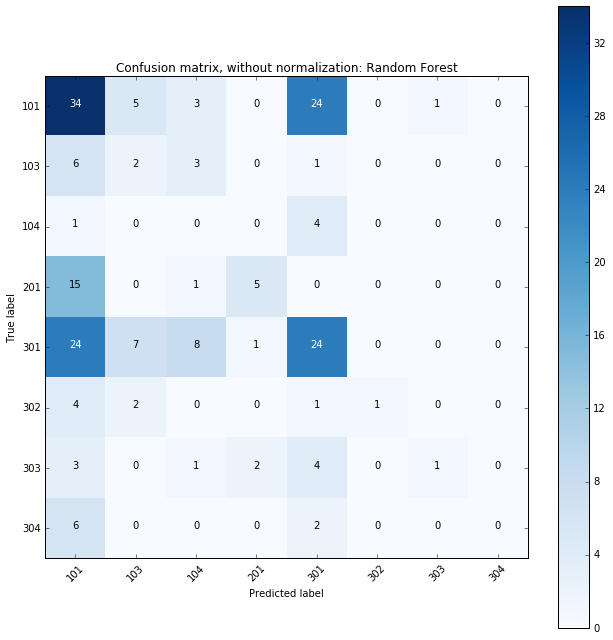

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


113.0
Selected number of features: 88
Train set size after feature selection:  (3232, 88)
Test set size after feature selection:  (137, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.64286   0.93103   0.76056        29
      103.0    0.20000   0.33333   0.25000         3
      104.0    1.00000   0.08333   0.15385        12
      201.0    0.50000   0.21429   0.30000        14
      301.0    0.64557   0.89474   0.75000        57
      303.0    1.00000   0.18750   0.31579        16
      304.0    0.00000   0.0

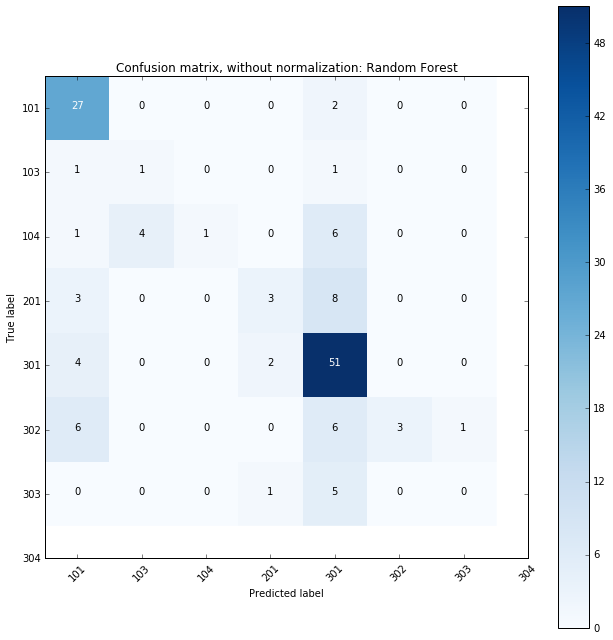

120.0
Selected number of features: 88
Train set size after feature selection:  (3311, 88)
Test set size after feature selection:  (58, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.97059   1.00000   0.98507        33
      103.0    0.00000   0.00000   0.00000         4
      104.0    0.00000   0.00000   0.00000         0
      201.0    0.50000   0.16667   0.25000         6
      301.0    0.62500   0.90909   0.74074        11
      302.0    1.00000   1.00000   1.00000         4

avg / total    0.79146   0.8

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


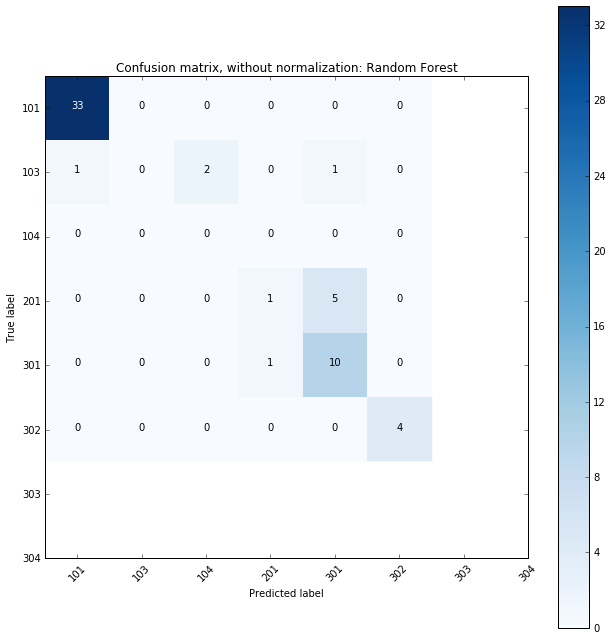

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


101.0
Selected number of features: 88
Train set size after feature selection:  (3146, 88)
Test set size after feature selection:  (223, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.85385   1.00000   0.92116       111
      103.0    0.50000   1.00000   0.66667         3
      104.0    1.00000   0.23077   0.37500        13
      201.0    0.75000   0.28125   0.40909        32
      301.0    0.24138   0.73684   0.36364        19
      302.0    1.00000   0.77778   0.87500         9
      303.0    0.75000   0.3

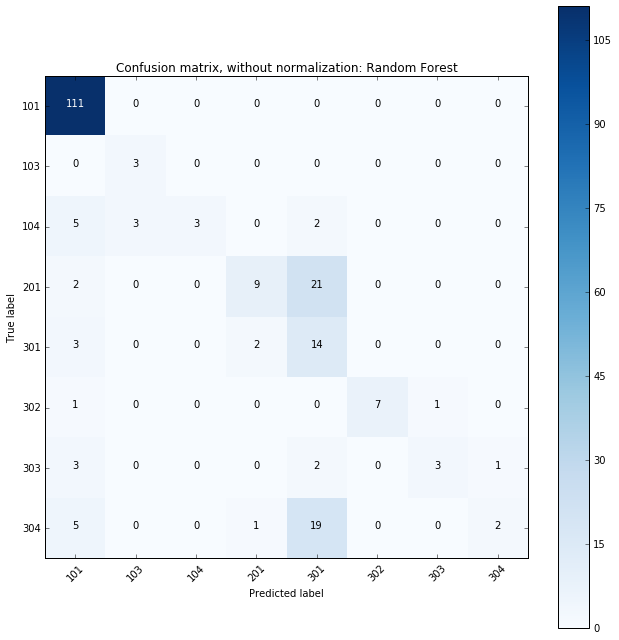

123.0
Selected number of features: 88
Train set size after feature selection:  (3304, 88)
Test set size after feature selection:  (65, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.86667   1.00000   0.92857        13
      201.0    0.80000   0.30769   0.44444        13
      301.0    0.47826   0.78571   0.59459        14
      302.0    1.00000   1.00000   1.00000        15
      303.0    0.80000   0.40000   0.53333        10
      304.0    0.00000   0.00000   0.00000         0

avg / total    0.79019   0.7

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


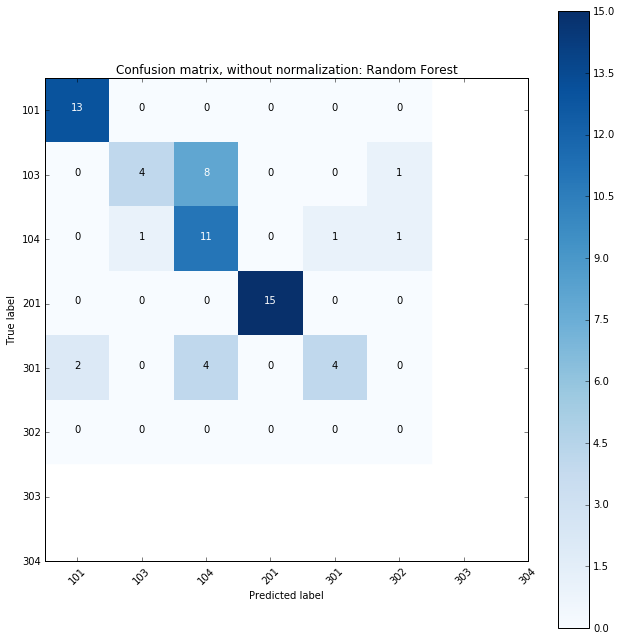

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


106.0
Selected number of features: 88
Train set size after feature selection:  (3191, 88)
Test set size after feature selection:  (178, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.66667   0.78049   0.71910        41
      103.0    0.66667   1.00000   0.80000         2
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.00000   0.00000   0.00000        32
      301.0    0.47126   0.73214   0.57343        56
      302.0    1.00000   1.00000   1.00000         5
      303.0    1.00000   0.1

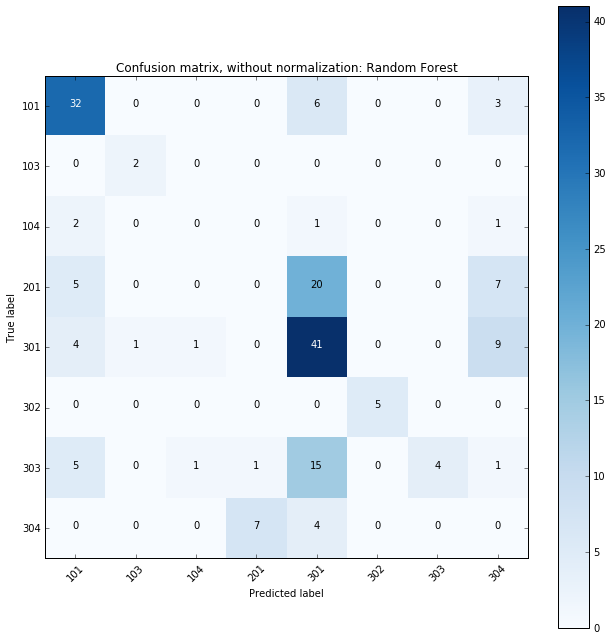

124.0
Selected number of features: 88
Train set size after feature selection:  (3285, 88)
Test set size after feature selection:  (84, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.18182   0.31579   0.23077        19
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.57143   0.22222   0.32000        18
      201.0    0.00000   0.00000   0.00000        12
      301.0    0.04167   0.33333   0.07407         3
      302.0    0.00000   0.00000   0.00000         4
      303.0    0.50000   0.05

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


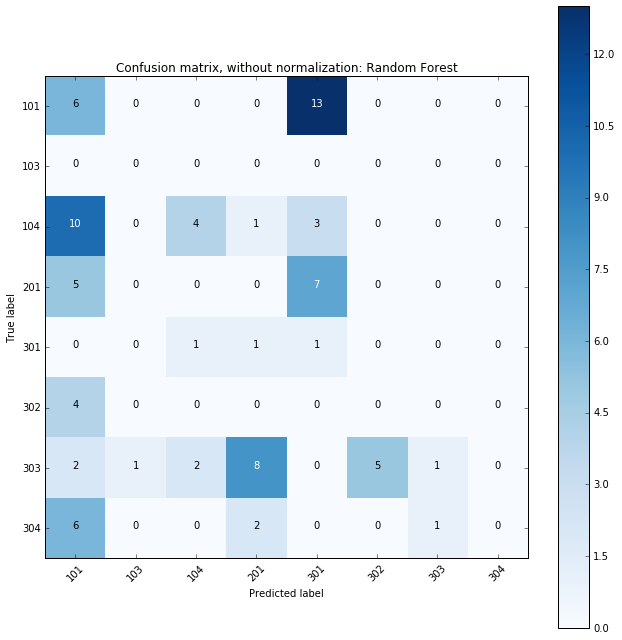

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


119.0
Selected number of features: 88
Train set size after feature selection:  (3252, 88)
Test set size after feature selection:  (117, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.48837   0.87500   0.62687        24
      103.0    1.00000   0.20000   0.33333         5
      104.0    0.00000   0.00000   0.00000         0
      201.0    0.30000   0.27273   0.28571        11
      301.0    0.81667   0.85965   0.83761        57
      303.0    1.00000   0.05000   0.09524        20

avg / total    0.73992   0.6

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


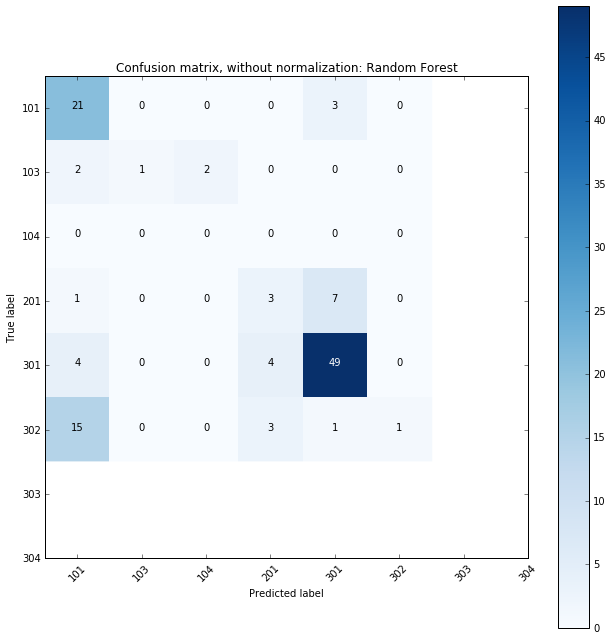

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


116.0
Selected number of features: 88
Train set size after feature selection:  (3196, 88)
Test set size after feature selection:  (173, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.92135   0.87234   0.89617        94
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.00000   0.00000   0.00000        15
      301.0    0.29688   0.86364   0.44186        22
      303.0    0.15385   0.13333   0.14286        15
      304.0    1.00000   0.08333   0.15385        12

avg / total    0.62107   0.

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


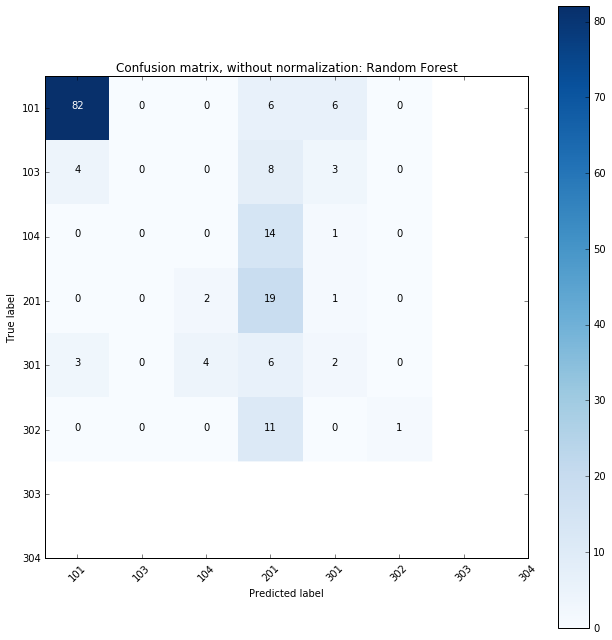

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


121.0
Selected number of features: 88
Train set size after feature selection:  (3201, 88)
Test set size after feature selection:  (168, 88)
Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

      101.0    0.84615   0.94286   0.89189        35
      103.0    0.50000   0.50000   0.50000         2
      104.0    0.33333   0.20000   0.25000         5
      201.0    0.47368   0.50000   0.48649        18
      301.0    0.82222   0.77083   0.79570        96
      302.0    1.00000   1.00000   1.00000         1
      303.0    0.33333   0.3

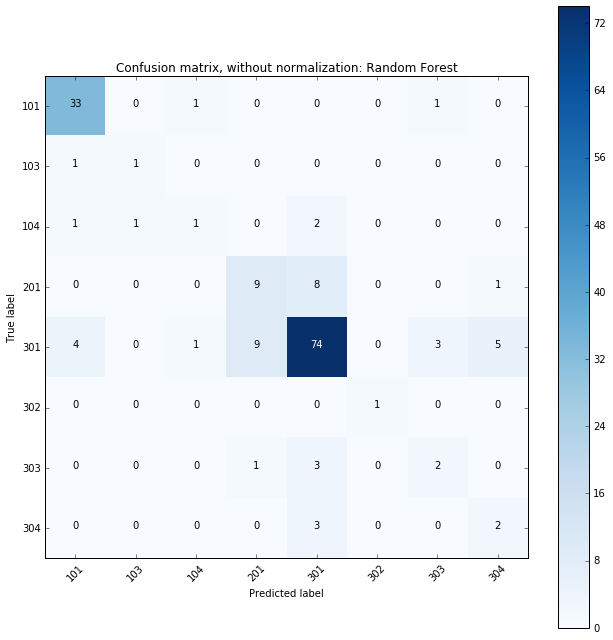

In [16]:
# a = []
print('Number of subjects: ', len(groups))

results = {}

for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    train = df.loc[(df.subject != g)]
    
    features = select_features(train[features], train['activity'])    
    
    X_train = train[features]
    y_train = train['activity']
    print("Train set size after feature selection: ", X_train.shape)
    
    X_test = test[features]
    y_test = test['activity']
    print("Test set size after feature selection: ", X_test.shape)    
    
    models = grid(X_train,y_train)
    
    #fitting models to test_data
    for model in models:
        res = test_classifier (model, X_train, y_train, X_test, y_test)
        if model[2] not in results:
            results[model[2]] = [[],[]]
        results[model[2]][0].append(res[0])
        results[model[2]][1].append(res[1])
    
#     a.append(run(pram,X_train,y_train,X_test,y_test))
# avg = np.array(a)
# print(np.mean(avg))    

Random Forest :
Average Weighted F1-score:  0.467328393239
Confusion matrix


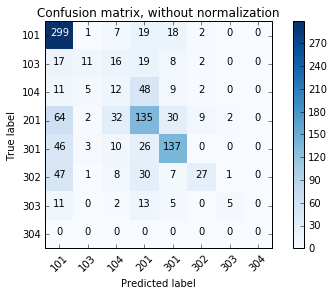

{'Random Forest': [0.46732839323939851, array([[299,   1,   7,  19,  18,   2,   0,   0],
       [ 17,  11,  16,  19,   8,   2,   0,   0],
       [ 11,   5,  12,  48,   9,   2,   0,   0],
       [ 64,   2,  32, 135,  30,   9,   2,   0],
       [ 46,   3,  10,  26, 137,   0,   0,   0],
       [ 47,   1,   8,  30,   7,  27,   1,   0],
       [ 11,   0,   2,  13,   5,   0,   5,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])]}


In [19]:
results_average = {}
for key, value in results.items():
    #print("key",key)
    #print("val",value)
    results_average[key] = []
    results_average[key].append(np.mean(value[0]))
    
    conf_mat_sum = np.array([[0 for col in range(8)] for row in range(8)])
    for x in value[1]:
        if len(conf_mat_sum) > len(x):
            c = conf_mat_sum.copy()
            c[:x.shape[0],:x.shape[1]] +=  x
        conf_mat_sum = c
    
    results_average[key].append(conf_mat_sum)
    
    print(key,':')
    print("Average Weighted F1-score: ", results_average[key][0])
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat_sum, classes=class_names, title='Confusion matrix, without normalization')

    plt.show()
    
    
print(results_average)